In [1]:
%matplotlib inline


============================
Underfitting vs. Overfitting
============================

This example shows how underfitting and overfitting arise when using
polynomial regression to approximate
a nonlinear function, $y =1.5 \cos (\pi x).$ 

The plots shows the function $y(x)$ and the estimated curves of of different degrees.  

We observe the following: 

- The linear function (polynomial with degree 1) is not sufficient to fit the
training samples---this is  **underfitting**. 
- A polynomial of degree 4 approximates the true function almost perfectly and gives the smallest MSE.
- For higher degrees, the model  **overfits** the training data, and the mean-squared erros (MSE)
become very large i.e. the model is learning the noise in the training data.

We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation and then calculating the mean squared error (MSE) on the validation
set. The  higher the value, the less likely the model generalizes correctly from the
training data since it is brittle.


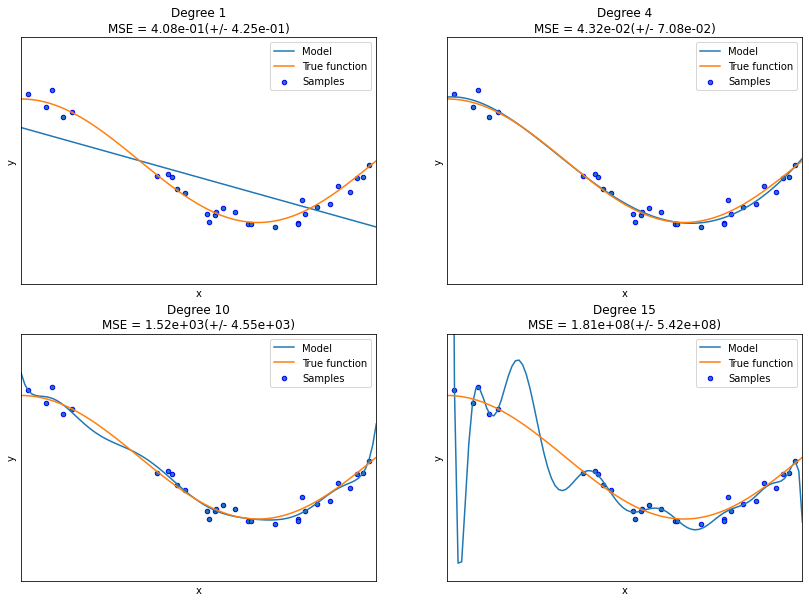

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X) #np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 10, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 10))
for i in range(len(degrees)):
    ax = plt.subplot(2, 2, i + 1) #plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
#plt.show()
plt.savefig('under_over.png',dpi=600)